In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
# twitter api
import tweepy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# Import Twitter data

In [ ]:
# Sentimental analysis
# Please insert Twitter API Credentials
# Twitter API credentials
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = ""

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

In [ ]:
# print api information
print(api)

In [ ]:
# verify if the credentials are correct
try :
    api.verify_credentials()
    print("Authentication OK")
except :
    print("Error during authentication")

In [ ]:
# check api rate limit for api calls
print("API rate limit: ", api.rate_limit_status()['resources']['search'])
# check time of reset
print("Reset time: ", api.rate_limit_status()['resources']['search']['/search/tweets']['reset'])

In [ ]:
def tweets_getter(query, count, date):
    tweets = api.search_tweets(q=query, count=count, tweet_mode="extended", until=date, lang="en")
    tweets_df = pd.DataFrame(columns = ["Time", "Tweet", "User", "Location", "Retweets", "Likes"])
    for i in range(len(tweets)):
        tweets_df.loc[i, "Time"] = tweets[i].created_at
        tweets_df.loc[i, "Tweet"] = tweets[i].full_text
        tweets_df.loc[i, "User"] = tweets[i].user.screen_name
        tweets_df.loc[i, "Location"] = tweets[i].user.location
        tweets_df.loc[i, "Retweets"] = tweets[i].retweet_count
        tweets_df.loc[i, "Likes"] = tweets[i].favorite_count
    return tweets_df

In [ ]:
# Query: Twitter, Elon Musk, Mastodon, Jack Dorsey, Decentralized Social Network, Social Media, Twitter Takeover, Tesla
# Do this for 100 times
# Insert Desired Data
date_before = ""
#  make empty dataframes for each query
twitter = pd.DataFrame(columns = ["Time", "Tweet", "User", "Location", "Retweets", "Likes"])
elon = pd.DataFrame(columns = ["Time", "Tweet", "User", "Location", "Retweets", "Likes"])
mastodon = pd.DataFrame(columns = ["Time", "Tweet", "User", "Location", "Retweets", "Likes"])
jack = pd.DataFrame(columns = ["Time", "Tweet", "User", "Location", "Retweets", "Likes"])
decentralized = pd.DataFrame(columns = ["Time", "Tweet", "User", "Location", "Retweets", "Likes"])
social = pd.DataFrame(columns = ["Time", "Tweet", "User", "Location", "Retweets", "Likes"])
takeover = pd.DataFrame(columns = ["Time", "Tweet", "User", "Location", "Retweets", "Likes"])
tesla = pd.DataFrame(columns = ["Time", "Tweet", "User", "Location", "Retweets", "Likes"])

In [ ]:
for i in range(10):
    # get tweets 100 times for each search query, use concat to add to the dataframe
    twitter = pd.concat([twitter, tweets_getter("Twitter", 100, date_before)])
    elon = pd.concat([elon, tweets_getter("Elon Musk", 100, date_before)])
    mastodon = pd.concat([mastodon, tweets_getter("Mastodon", 100, date_before)])
    jack = pd.concat([jack, tweets_getter("Jack Dorsey", 100, date_before)])
    decentralized = pd.concat([decentralized, tweets_getter("Decentralized Social Network", 100, date_before)])
    social = pd.concat([social, tweets_getter("Social Media", 100, date_before)])
    takeover = pd.concat([takeover, tweets_getter("Twitter Takeover", 100, date_before)])
    tesla = pd.concat([tesla, tweets_getter("Tesla", 100, date_before)])

In [ ]:
# Turn all of the dataframes into separate csv files
twitter.to_csv("twitter.csv")
elon.to_csv("elon.csv")
mastodon.to_csv("mastodon.csv")
jack.to_csv("jack.csv")
decentralized.to_csv("decentralized.csv")
social.to_csv("social.csv")
takeover.to_csv("takeover.csv")
tesla.to_csv("tesla.csv")

In [ ]:
# stopwords from nltk library
stop_words = set(stopwords.words('english'))

In [ ]:
def sentiment(tweet):
    # do lemmatization, remove stop words, remove punctuation, remove numbers, emojis
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [word for word in tweet if not word in stop_words]
    tweet = [word for word in tweet if word.isalpha()]
    tweet = [word for word in tweet if not word.isdigit()]
    tweet = " ".join(tweet)
    # sentiment analysis
    sent = TextBlob(tweet)
    return sent.sentiment.polarity

In [ ]:
# add sentiment column to each dataframe
twitter["Sentiment"] = twitter["Tweet"].apply(sentiment)
elon["Sentiment"] = elon["Tweet"].apply(sentiment)
mastodon["Sentiment"] = mastodon["Tweet"].apply(sentiment)
jack["Sentiment"] = jack["Tweet"].apply(sentiment)
decentralized["Sentiment"] = decentralized["Tweet"].apply(sentiment)
social["Sentiment"] = social["Tweet"].apply(sentiment)
takeover["Sentiment"] = takeover["Tweet"].apply(sentiment)
tesla["Sentiment"] = tesla["Tweet"].apply(sentiment)

In [ ]:
# go through each row of each dataframe and do sentiment analysis on tweet column using sentiment funciton
# add sentiment column to each dataframe
twitter["Sentiment"] = twitter["Tweet"].apply(sentiment)
elon["Sentiment"] = elon["Tweet"].apply(sentiment)
mastodon["Sentiment"] = mastodon["Tweet"].apply(sentiment)
jack["Sentiment"] = jack["Tweet"].apply(sentiment)
decentralized["Sentiment"] = decentralized["Tweet"].apply(sentiment)
social["Sentiment"] = social["Tweet"].apply(sentiment)
takeover["Sentiment"] = takeover["Tweet"].apply(sentiment)
tesla["Sentiment"] = tesla["Tweet"].apply(sentiment)

In [ ]:
# print sentiment column of each dataframe
print(twitter['Tweet'], twitter["Sentiment"])
print(elon['Tweet'], elon["Sentiment"])

In [ ]:
# drop all 0 sentiment rows
twitter = twitter[twitter["Sentiment"] != 0]
elon = elon[elon["Sentiment"] != 0]
mastodon = mastodon[mastodon["Sentiment"] != 0]
jack = jack[jack["Sentiment"] != 0]
decentralized = decentralized[decentralized["Sentiment"] != 0]
social = social[social["Sentiment"] != 0]
takeover = takeover[takeover["Sentiment"] != 0]
tesla = tesla[tesla["Sentiment"] != 0]

In [ ]:
# print mean sentiment
print("Date:", date_before)
print("Twitter:", twitter["Sentiment"].mean())
print("Elon Musk:", elon["Sentiment"].mean())
print("Mastodon:", mastodon["Sentiment"].mean())
print("Jack Dorsey:", jack["Sentiment"].mean())
print("Decentralized Social Network:", decentralized["Sentiment"].mean())
print("Social Media:", social["Sentiment"].mean())
print("Twitter Takeover:", takeover["Sentiment"].mean())
print("Tesla:", tesla["Sentiment"].mean())

# Get Mastodon Data

In [ ]:
path='/content/mastodon2.json'
with open(path) as json_data:
   obj = json.load(json_data)
  #  print(obj)
   df_m = pd.DataFrame(obj['data']['platforms'][0]['statSet'], columns=['date','usersMonthly','usersTotal'])

In [ ]:
# convert date to datetype, sort and reset index by extracting ones from 2022
df_m['date'] = pd.to_datetime(df_m['date'])
df_m=df_m.sort_values(by='date')

mask=df_m['date']>'2021-12-31'
df_m=df_m.loc[mask].reset_index(drop=True)

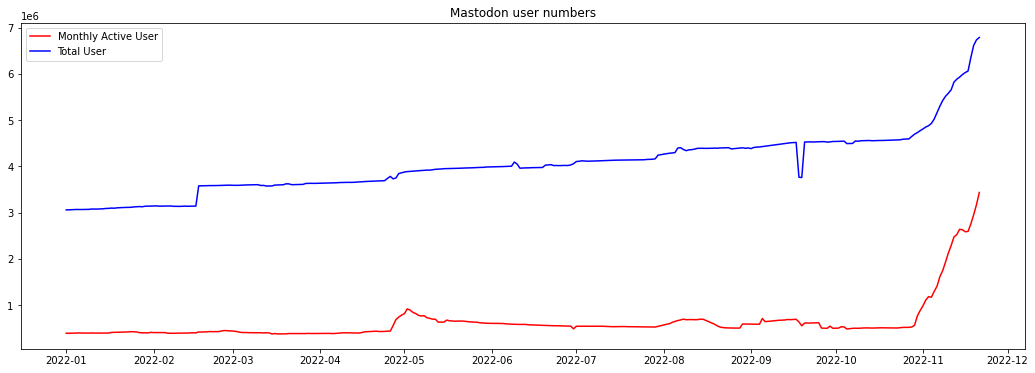

In [ ]:
plt.figure(figsize=(18,6))
plt.title("Mastodon user numbers")
plt.plot(df_m['date'],df_m['usersMonthly'],color='r',label='Monthly Active User')
plt.plot(df_m['date'],df_m['usersTotal'],color='b',label='Total User')
plt.legend()
plt.show()

In [ ]:
Nov_interval = ('2022-10-22','2022-11-21')

In [ ]:
# mask1=(df_m['date'] >= Apr_May_interval[0]) & (df_m['date'] <= Apr_May_interval[1])
mask1=(df_m['date'] >= Nov_interval[0]) & (df_m['date'] <= Nov_interval[1])
df1 = df_m.loc[mask1].reset_index(drop=True)
# df2 = df_m.loc[mask2].reset_index(drop=True)

In [ ]:
df1['Diff'] = df1['usersTotal'].diff()
df1.at[0,'Diff']=0

In [ ]:
df1

,date,usersMonthly,usersTotal,Diff
0,2022-10-22,505674.0,4571766.0,0.0
1,2022-10-23,505741.0,4572879.0,1113.0
2,2022-10-24,513990.0,4576615.0,3736.0
3,2022-10-25,518592.0,4588035.0,11420.0
4,2022-10-26,518142.0,4592742.0,4707.0
5,2022-10-27,519425.0,4594031.0,1289.0
6,2022-10-28,527861.0,4647710.0,53679.0
7,2022-10-29,562695.0,4695555.0,47845.0
8,2022-10-30,766199.0,4730701.0,35146.0
9,2022-10-31,882477.0,4772463.0,41762.0


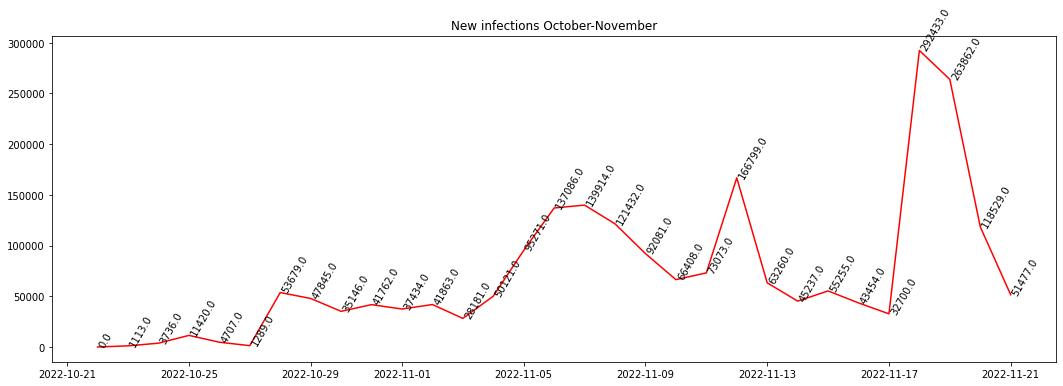

In [ ]:
plt.figure(figsize=(18,6))
plt.title('New infections October-November')
plt.plot(df1['date'],df1['Diff'],color='r')
for x, y in zip(df1['date'], df1['Diff']):
    plt.text(x=x, y=y, s=y,rotation=60)
plt.show()

# Use Stan SIR

In this stage, use a STAN-based model to find alpha and beta on the user in April.
<br>Use the Beta and Gamma to find the estimated R, beta/gamma

In [ ]:
!pip install nest-asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nest_asyncio
import stan
nest_asyncio.apply()

## SIR model

In [ ]:
# use exp for initial gamma and beta
model_code = """
data {
  int<lower=2> T;  // number of observations
  int<lower=0> y[T];     // observation vector
  int<lower=0> N; //Total population
  int<lower=3> Tf;
}
parameters {
  real<lower=0,upper=1> B;    //Beta
  real<lower=0,upper=1> gam;  //Gamma
  real<lower=0> I_init;
}
transformed parameters {
  vector[Tf] S;
  vector[Tf] I;
  vector[Tf] R;
  vector[Tf] lam;

  S[1] = N - I_init;
  I[1] = I_init;
  R[1] = 0;
  lam[1] = B*((S[1]*I[1])/N);
  
  for (t in 2:Tf){
    S[t] = S[t-1]-B*S[t-1]*I[t-1]/N; 
    I[t] = I[t-1] + B*((S[t-1]*I[t-1])/N) - gam*I[t-1];
    R[t] = R[t-1] + gam*I[t-1];
    lam[t] = B*((S[t]*I[t])/N);
  }
}

model {
  gam ~ exponential(5);
  B ~ exponential(5);
  I_init ~ normal(0,100);

  for (t in 1:T){
    y[t] ~ poisson(lam[t]); 
  }
}
generated quantities {
  vector[Tf] forecast; // forecast cases from T to Tf
  forecast=lam;
}
"""

[  1113   3736  11420   4707   1289  53679  47845  35146  41762  37434
  41863  28181  50121  95271 137086 139914 121432  92081  66408  73073
 166799  63260  45237  55255  43454  32700 292433 263862 118529] 29


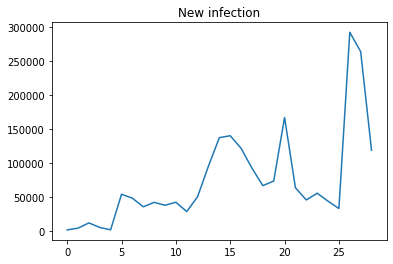

In [ ]:
arr1=df1['Diff'].to_numpy().astype(int)
start,end=1,30
print(arr1[start:end],len(arr1[start:end]))
plt.title("New infection")
plt.plot(arr1[start:end])
plt.show()

In [ ]:
mast_data_45 = {"T":len(arr1[start:end]),"y":arr1[start:end],"N":41500000, "Tf":45} # 41500000 is total twitter US users

posterior = stan.build(model_code, data=mast_data_45, random_seed=2)

fit = posterior.sample(num_chains=1, num_samples=1000)

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/tmp/httpstan_q5i1cill/model_miimyjaz.stan', line 35, column 20: Argument 100 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   5% (100/2000)
Sampling:  15% (300/2000)
Sampling:  20% (400/2000)
Sampling:  25% (500/2000)
Sampling:  30% (600/2000)
Sampling:  35% (700/2000)
Sampling:  40% (800/2000)
Sampling:  45% (900/2000)
Sampling: 100% (2000/2000)
Sampling: 100% (2000/2000), done.
Messages received during sampling:
  Gradient evaluation took 0.00013 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1.3 seconds.
  Adjust your expectations accordingly!
  Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
  Exception: poisson_lpmf: Rate parameter is -inf, but must be nonnegative! (in '/tmp/httpstan_7sdlmz5i/model_miimyjaz.stan', line 38, co

## Get beta and gamma from prediction

In [ ]:
# fit and obtain the data
gamma=np.mean(fit['gam'])
beta=np.mean(fit['B'])
R=beta/gamma
print('Average Beta:',beta)
print('Avergae Gamma:',gamma)
print('Avergae Reproduction Number is:',R)   # R0 is the number of new cases a initial case generates
lst=np.mean(fit["forecast"],axis=1)

Average Beta: 0.9999744552346607
Avergae Gamma: 0.8971009148589111
Avergae Reproduction Number is: 1.1146733201046046


In [ ]:
path='/content/mastodon3.json'
with open(path) as json_data:
  obj = json.load(json_data)
  df_m = pd.DataFrame(obj['data']['platforms'][0]['statSet'], columns=['date','usersMonthly','usersTotal'])

df_m['date'] = pd.to_datetime(df_m['date'])
df_m = df_m.sort_values(by='date')

Nov_interval = ('2022-10-22','2022-12-04')
mask1=(df_m['date'] >= Nov_interval[0]) & (df_m['date'] <= Nov_interval[1])
df2 = df_m.loc[mask1].reset_index(drop=True)
df2['Diff'] = df2['usersTotal'].diff()

In [ ]:
df2.at[0,'Diff']=0
lst2=df2['Diff'].to_numpy()
lst2=lst2.astype(int)
print(lst2)

[     0   1113   3736  11420   4707   1289  53679  47845  35146  41762
  37434  41863  28181  50121  95271 137086 139914 121432  92081  66408
  73073 166799  63260  45237  55255  43454  32700 292433 263862 118529
  70941  44600 -13347  23701  22092  45573  22358  21790  42342  17468
  10972   9181  14221   8413]


In [ ]:
pad=np.array([0])
lst=np.concatenate((pad,lst))
lst=lst.astype(int)
print(lst)
# lst=np.delete(lst,[0])

[     0  18609  20499  22571  24839  27321  30033  32992  36216  39723
  43531  47658  52121  56937  62118  67677  73622  79958  86683  93792
 101270 109095 117235 125650 134285 143076 151945 160805 169554 178082
 186271 193996 201130 207547 213127 217759 221345 223807 225087 225152
 223994 221634 218115 213507 207900]


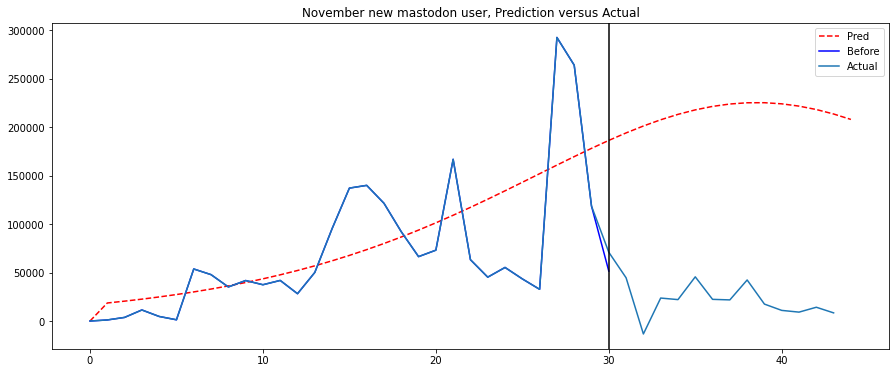

In [ ]:
plt.figure(figsize=(15,6))
plt.title('November new mastodon user, Prediction versus Actual')

plt.plot(lst,color='red',label='Pred',linestyle='--')
plt.plot(arr1[:],color='blue',label='Before')
plt.plot(lst2,label='Actual')

plt.axvline(x=30, c='black')

plt.legend()
plt.show()

In [ ]:
# pytorch LSTM model
# in the other notebook